In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'heart-failure-prediction:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1582403%2F2603715%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240316%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240316T062931Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D48d7ba0579a351afdfb893bb8dc058dab0a1a4f1e4b5246f947c5694f1b9dc16d19c36a0570bb972db1b8f722ea9de02b0831e3552a53c1a754900d1a6b868f531b7320d9ed6bcbcd4eee5ab483539dd40aa1b00a4de46448431724c9e63d4a37f860e714597479ab4a030cbdf222bb5746057b727b6a7cde8f8a00f97c382e4d7f1d1aa7c021c9dd50425fd54c78ac09a387e4123fab51ebbbe0cfb3e509d9d6f7b572a0fb44f5dc3427e985c771586c95b48cef18670840c15a4b6445a248f2ac829b13ef9396cd7a1ce3a69822cb820c8225b39aaa82a7849951b0390c4fbf16ee10fb677d92dc3b091bf21dbab30a9fd8852b9bc369b45e3699c77e58ad0'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 8762 bytes downloaded
Downloaded and uncompressed: heart-failure-prediction
Data source import complete.


<div style="padding-top: 12px;">
    <center>
        <span style="font-size: 50px; font-family: Montserrat; font-weight: 700;">Prediksi Penyakit Jantung</span>
    </center>
</div>
<hr>

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">1 | Pendahuluan </div>
<center>
    <img src="https://images.unsplash.com/photo-1623134915837-d2fdb4f59035?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NHx8aGVhcnQlMjBmYWlsdXJlfGVufDB8fDB8fHww" alt="Jantung" width="60%">
    <br>
    <span style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 12px;"><i>Photo by Ali Hajiluyi from Unsplash</i></span>
</center>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">1.1 | Tentang Dataset </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Penyakit kardiovaskular (CVD) adalah penyebab kematian nomor 1 di dunia, dengan estimasi 17,9 juta jiwa tiap tahun, yang tercatat sebesar 31% dari seluruh kematian di dunia. Empat dari lima kematian akibat CVD disebabkan oleh serangan jantung dan stroke, dan satu - tiga dari kematian tersebut terjadi secara cepat pada orang di bawah usia 70 tahun. Gagal jantung merupakan kejadian umum yang disebabkan oleh CVD dan dataset ini mengandung 11 fitur yang dapat digunakan untuk memprediksi kemungkinan terkena penyakit jantung.
    <br>
    Orang dengan penyakit kardiovaskular atau orang dengan risiko kardiovaskular tinggi (disebabkan oleh adanya satu atau lebih faktor seperti hipertensi, diabetes, hiperlipidemia, atau telah memiliki penyakit) membutuhkan deteksi dini dan penanganan dimana sebuah model pemelajaran mesin dapat menjadi bantuan yang baik.
</div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">1.2 | Tujuan </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Proyek ini bertujuan untuk:
    <ol>
        <li>Memahami dataset melalui eksplorasi data dan visualisasi data.</li>
    </ol>
</div>



# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">2 | Mengimpor Library </div>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">3 | Memuat Dataset </div>

In [ ]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.head().style.background_gradient(cmap='OrRd').hide()

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0


In [ ]:
# -- Dataset Information --
print('Total Rows\t:', df.shape[0])
print('Total Columns\t:', df.shape[1])

Total Rows	: 918
Total Columns	: 12


In [ ]:
# -- Dataset Summary --
df.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)

In [ ]:
# -- Null Values --
print(df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
# -- Duplicated Data --
print(df.duplicated().sum())

0


# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4 | Eksplorasi Data </div>

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.1 | Data Kategorikal </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Kolom data yang termasuk ke dalam data kategorikal antara lain:
    <ol>
        <li>Sex</li>
        <li>ChestPainType</li>
        <li>FastingBS</li>
        <li>RestingECG</li>
        <li>ExerciseAngina</li>
        <li>ST_Slope</li>
    </ol>
</div>

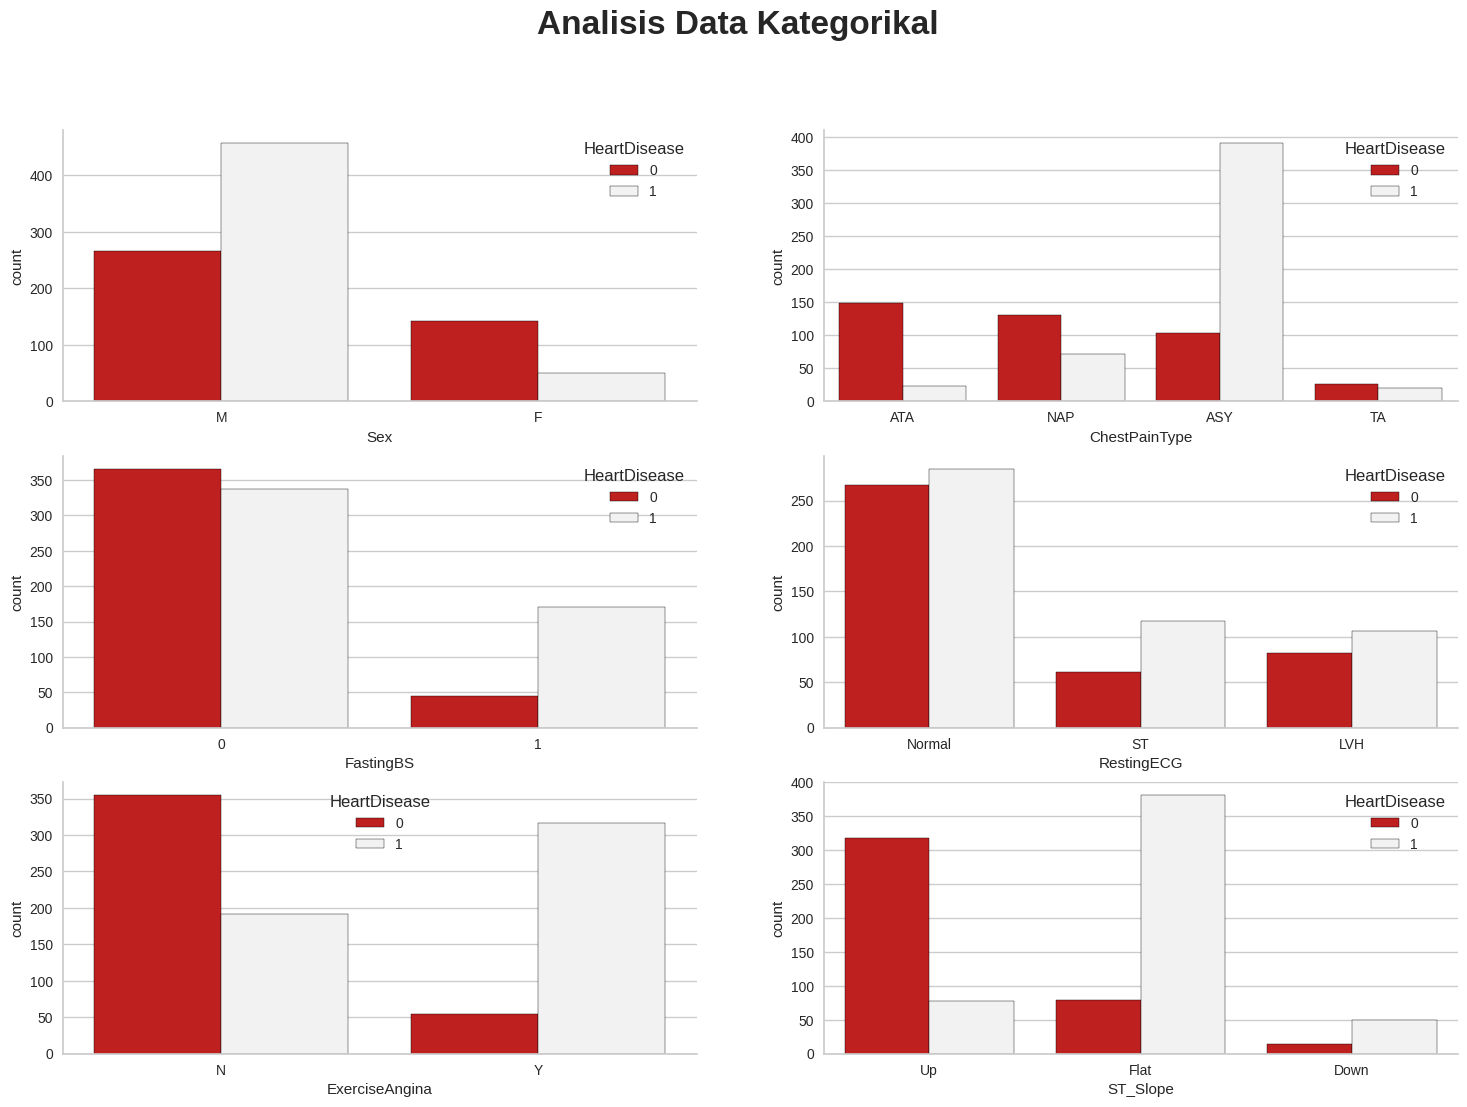

In [ ]:
# -- Konfigurasi Warna --
colors = ['#D90404', '#F2F2F2']

# -- Figur --
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(3,2)
plt.suptitle("Analisis Data Kategorikal", fontweight='heavy', fontsize='24')

# -- Bar Chart --
ax_sex = fig.add_subplot(gs[0,0])
sns.countplot(x='Sex', hue='HeartDisease', data=df, ax=ax_sex, palette=colors, edgecolor='#000000')
sns.despine()

ax_chestpaintype = fig.add_subplot(gs[0,1])
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, ax=ax_chestpaintype, palette=colors, edgecolor='#000000')
sns.despine()

ax_fastingbs = fig.add_subplot(gs[1,0])
sns.countplot(x='FastingBS', hue='HeartDisease', data=df, ax=ax_fastingbs, palette=colors, edgecolor='#000000')
sns.despine()

ax_restingecg = fig.add_subplot(gs[1,1])
sns.countplot(x='RestingECG', hue='HeartDisease', data=df, ax=ax_restingecg, palette=colors, edgecolor='#000000')
sns.despine()

ax_exerciseangina = fig.add_subplot(gs[2,0])
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df, ax=ax_exerciseangina, palette=colors, edgecolor='#000000')
sns.despine()

ax_stslope = fig.add_subplot(gs[2,1])
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df, ax=ax_stslope, palette=colors, edgecolor='#000000')
sns.despine()

plt.show()

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.2 | Data Numerikal </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    Kolom data yang termasuk ke dalam data numerikal antara lain:
    <ol>
        <li>Age</li>
        <li>Cholesterol</li>
        <li>FastingBS</li>
        <li>MaxHR</li>
        <li>Oldpeak</li>
    </ol>
</div>

<ipython-input-12-558f9caffd5f>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Age', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_age, palette=colors, shade=True)
<ipython-input-12-558f9caffd5f>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='RestingBP', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_restingbp, palette=colors, shade=True)
<ipython-input-12-558f9caffd5f>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Cholesterol', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_cholesterol, palette=colors, shade=True)
<ipython-input-12-

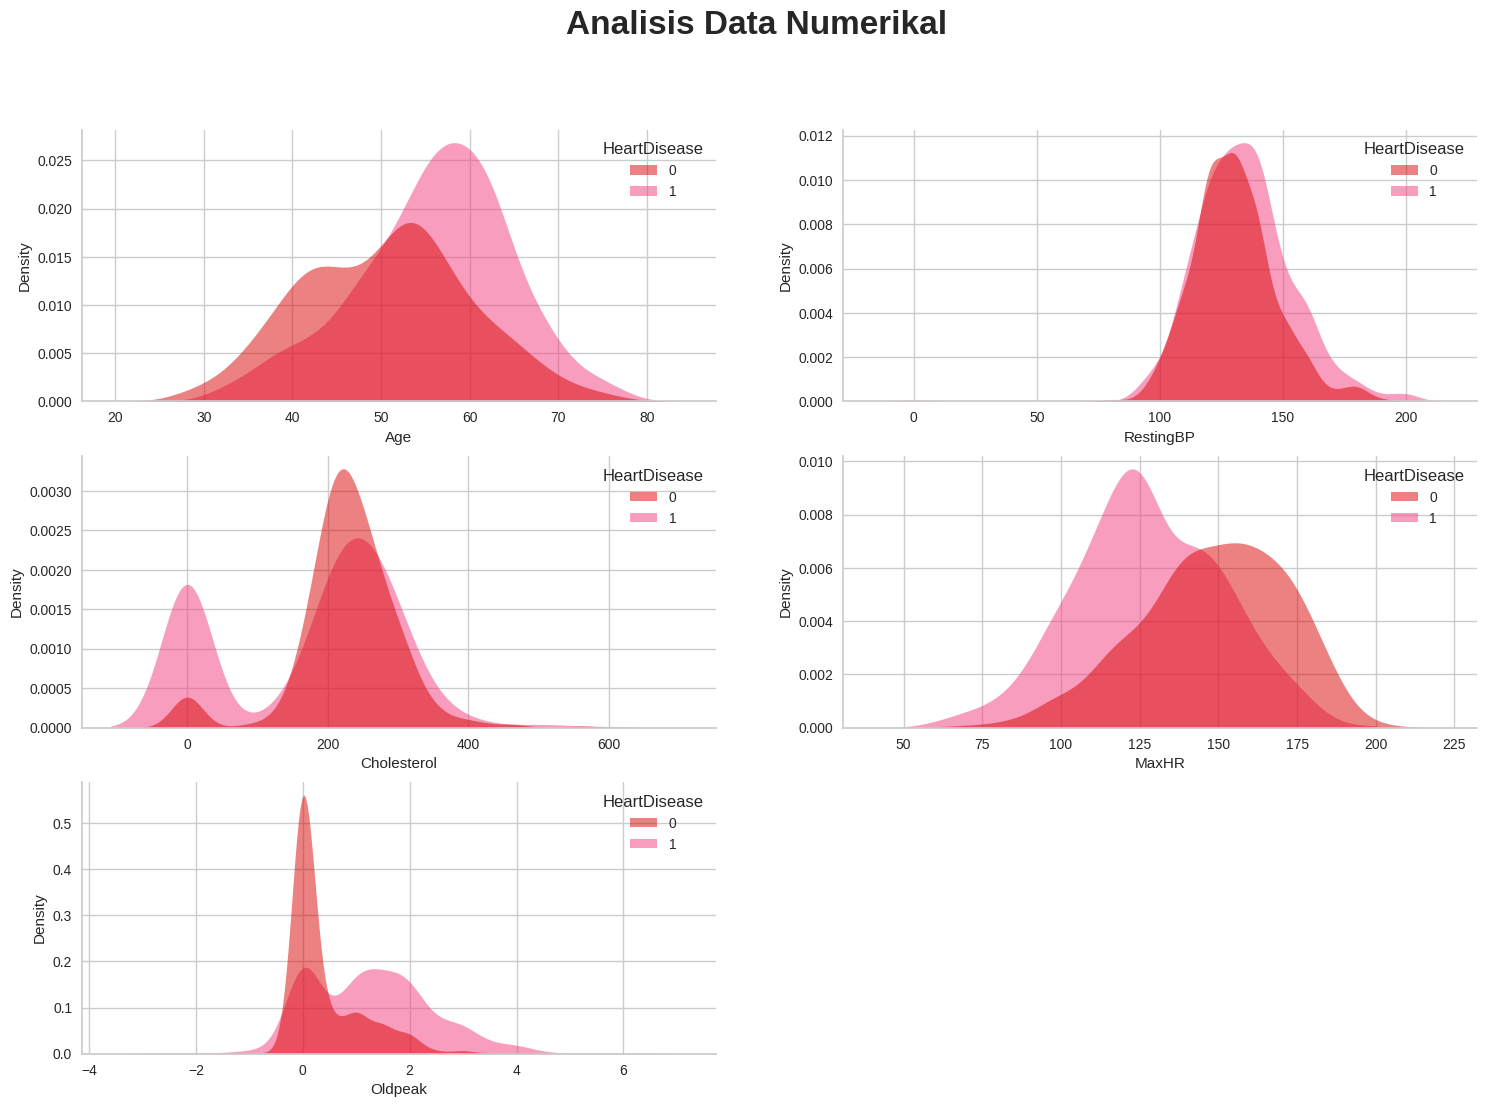

In [ ]:
# -- Konfigurasi Warna --
colors = ['#D90404', '#F23D7F']

# -- Figur --
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(3,2)
plt.suptitle("Analisis Data Numerikal", fontweight='heavy', fontsize='24')

# -- KDE Plot --
ax_age = fig.add_subplot(gs[0,0])
sns.kdeplot(x='Age', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_age, palette=colors, shade=True)
sns.despine()

ax_restingbp = fig.add_subplot(gs[0,1])
sns.kdeplot(x='RestingBP', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_restingbp, palette=colors, shade=True)
sns.despine()

ax_cholesterol = fig.add_subplot(gs[1,0])
sns.kdeplot(x='Cholesterol', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_cholesterol, palette=colors, shade=True)
sns.despine()

ax_maxhr = fig.add_subplot(gs[1,1])
sns.kdeplot(x='MaxHR', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_maxhr, palette=colors, shade=True)
sns.despine()

ax_oldpeak = fig.add_subplot(gs[2,0])
sns.kdeplot(x='Oldpeak', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_oldpeak, palette=colors, shade=True)
sns.despine()

plt.show()

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.3 | Data Target </div>

<ipython-input-13-e5eb2c2b203e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette=colors, edgecolor='#000000')


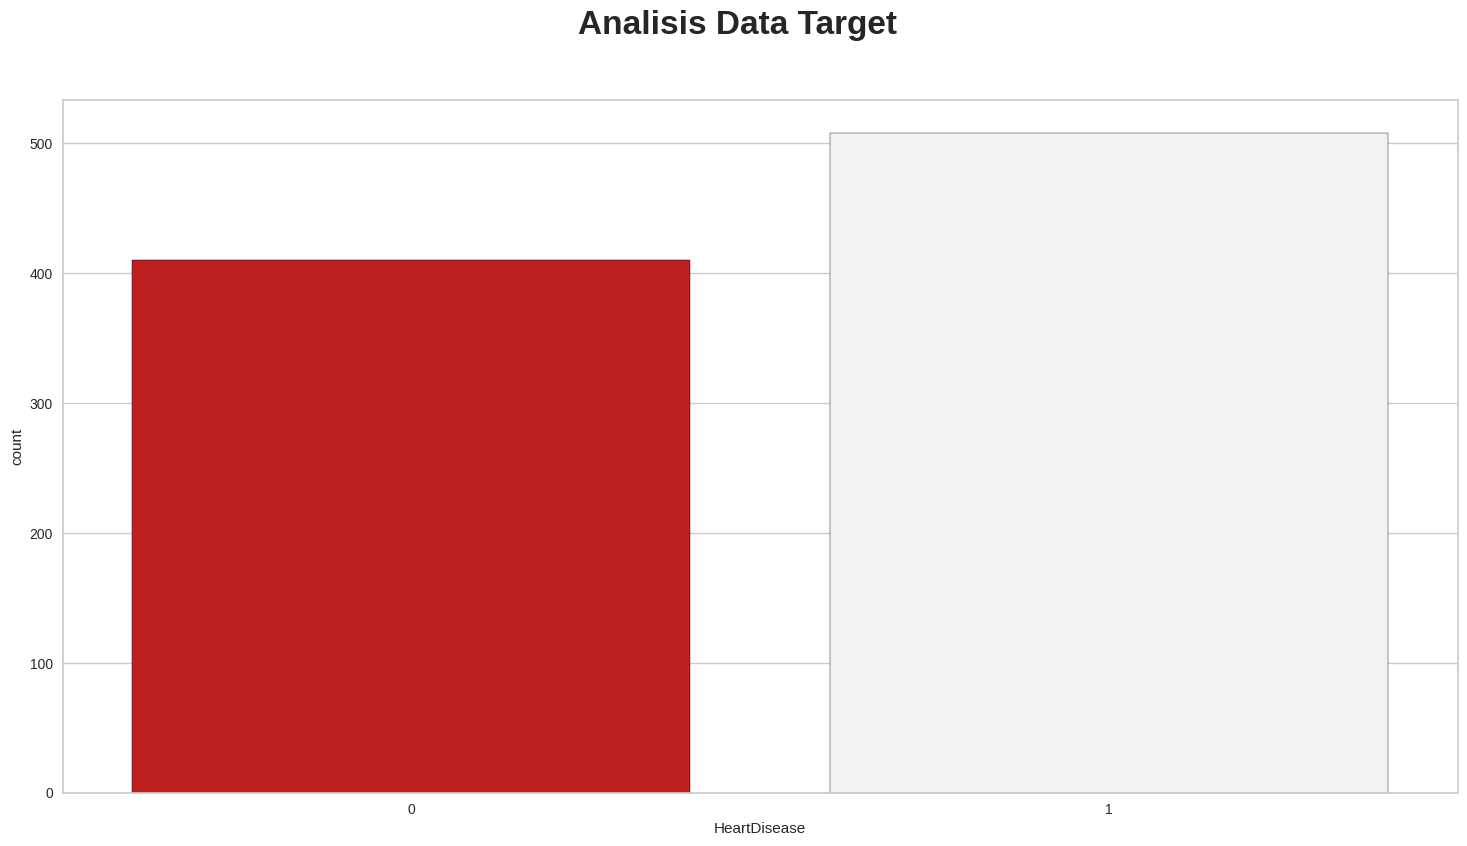

In [ ]:
# -- Konfigurasi Warna --
colors = ['#D90404', '#F2F2F2']

# -- Figur --
plt.figure(figsize=(18,9))
plt.suptitle("Analisis Data Target", fontweight='heavy', fontsize='24')

# -- Bar Chart --
sns.countplot(x='HeartDisease', data=df, palette=colors, edgecolor='#000000')

plt.show()

## <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">4.4 | Analisis Korelasi </div>

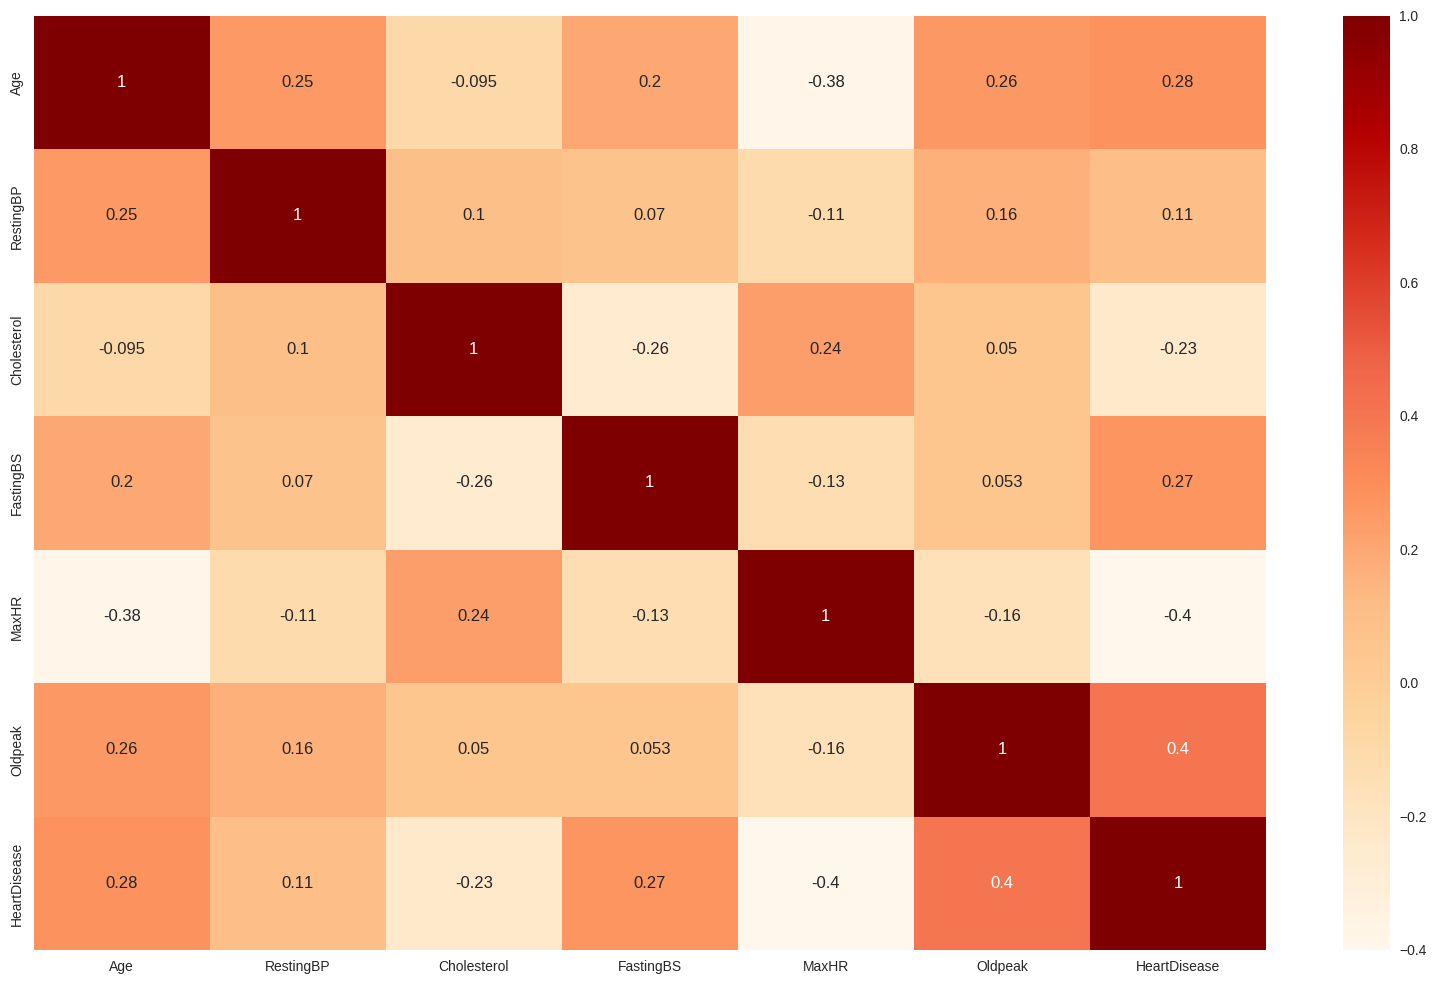

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='OrRd')
plt.tight_layout()
plt.show()

# <div style="font-family: Montserrat; font-weight: 600; line-height: 1.5;">5 | Referensi </div>
<div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 14px; text-align: justify">
    <b>Dataset</b>
    <ol>
        <li><a href="https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction">Heart Failure Prediction Dataset by FEDESORIANO - Kaggle</a></li>
    </ol>
    <b>Artikel Daring</b>
    <ol>
        <li><a href="https://algorit.ma/blog/logistic-regression-adalah-2022/">3 Tipe Logistic Regression yang Wajib Diketahui Data Analyst - Algoritma</a></li>
        <li><a href="https://codingstudio.id/blog/support-vector-machine/">Mengenal Support Vector Machine dan Cara Kerjanya - Coding Studio</a></li>
        <li><a href="https://dqlab.id/apa-itu-decision-tree-di-machine-learning-model">Apa Itu Decision Tree di Machine Learning Model? - DQLab</a></li>
        <li><a href="https://www.trivusi.web.id/2023/07/algoritma-adaboost.html">Algoritma AdaBoost: Pengertian, Cara Kerja, dan Kegunaannya - Trivusi</a></li>
        <li><a href="https://ilmudatapy.com/algoritma-k-nearest-neighbor-knn-untuk-klasifikasi/#:~:text=Seperti%20yang%20telah%20disebutkan%2C%20algoritma%20KNN%20merupakan%20algoritma,similarity%20atau%20kemiripan%20atau%20kedekatannya%20terhadap%20data%20lainnya.">Algoritma K-Nearest Neighbor (KNN) untuk Klasifikasi - IlmudataPy</a></li>
        <li><a href="https://www.alodokter.com/seperti-ini-cara-membaca-hasil-pemeriksaan-tekanan-darah">Inilah Cara Membaca Hasil Pemeriksaan Tekanan Darah yang Benar - Alodokter</a></li>
        <li><a href="https://www.alodokter.com/hal-hal-yang-perlu-anda-ketahui-tentang-tes-kolesterol#:~:text=Tes%20kolesterol%20adalah%20pemeriksaan%20yang%20dilakukan%20untuk%20mengukur,kolesterol%20yang%20tidak%20terkontrol%20dapat%20memicu%20berbagai%20penyakit%2C">Seputar Tes Kolesterol dan Hal-Hal yang Perlu Diketahui - Alodokter</a></li>
        <li><a href="https://www.alodokter.com/arti-tinggi-dan-rendahnya-kadar-gula-darah-dalam-tubuh">Arti Tinggi dan Rendahnya Kadar Gula Darah - Alodokter</a></li>
        <li><a href="https://www.halodoc.com/kesehatan/cek-glukosa-puasa">Cek Glukosa Puasa - Halodoc</a></li>
        <li><a href="https://www.runnerscase.com/2022/03/heart-rate.html">Apa Itu Heart Rate & Bagaimana Cara Menghitung Zona Heart Rate Saat Lari? - Runners Case</a></li>
        <li><a href="https://galihbahtera.medium.com/eksplorasi-data-dan-prediksi-pemodelan-dari-kasus-serangan-jantung-b31b184e5cc">Eksplorasi Data dan Prediksi Pemodelan dari Kasus Serangan Jantung - Medium</a></li>
    </ol>
    <b>Dokumentasi Kode</b>
    <ol>
        <li><a href="https://scikit-learn.org/stable/index.html">scikit-learn: machine learning in Python -- scikit-learn 1.4.1 documentation</a></li>
        <li><a href="https://www.scikit-yb.org/en/latest/index.html">Yellowbrick: Machine Learning Visualization -- Yellowbrick v1.5 documentation</a></li>
    </ol>
</div>

<center>
    <div style="font-family: Montserrat; line-height: 1.5; font-weight: 500; font-size: 10px;">
        Prediksi Penyakit Jantung menggunakan Algoritma Machine Learning (Version 1) | Released: 18 February 2024 | rafiromolo
    </div>
</center>